# Dall-E 3


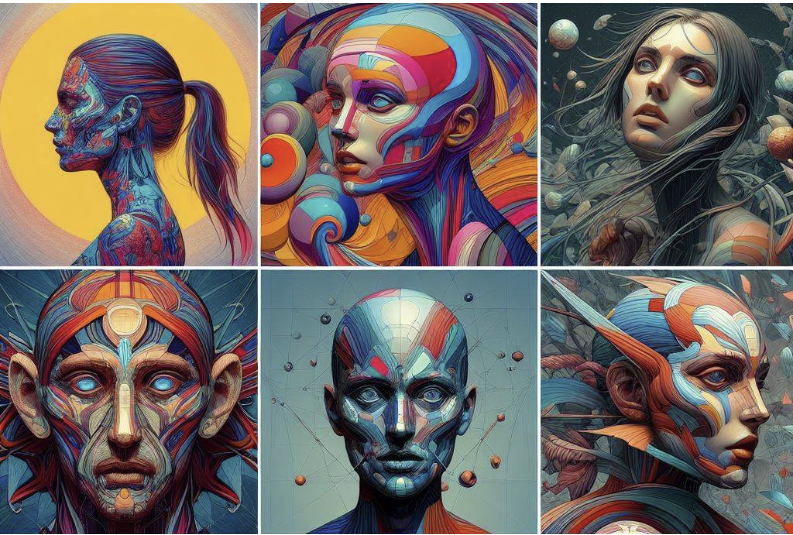

### Initialize the kernel

In [4]:
//#pragma warning disable SKEXP0010

#r "nuget: Microsoft.SemanticKernel, 1.7.1"
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha"
#r "nuget: Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha"

#!import Settings.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.SemanticKernel.TextToImage;
using Microsoft.SemanticKernel.ChatCompletion;

var kernel = Settings.InitializeKernelWithVision();

Installed Packages Microsoft.SemanticKernel, 1.7.1 Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha

Dall-E

In [5]:

#pragma warning disable SKEXP0001

var dallE = kernel.GetRequiredService<ITextToImageService>();

var imageDescription = "A cute baby sea otter";
var image = await dallE.GenerateImageAsync(imageDescription, 256, 256);

Console.WriteLine(imageDescription);
Console.WriteLine("Image URL: " + image);

/* Output:

A cute baby sea otter
Image URL: https://oaidalleapiprodscus.blob.core.windows.net/private/....

*/

Console.WriteLine("======== Chat with images ========");

var chatGPT = kernel.GetRequiredService<IChatCompletionService>();
var chatHistory = new ChatHistory(
   "You're chatting with a user. Instead of replying directly to the user" +
   " provide the description of an image that expresses what you want to say." +
   " The user won't see your message, they will see only the image. The system " +
   " generates an image using your description, so it's important you describe the image with details.");

var msg = "Hi, I'm from Tokyo, where are you from?";
chatHistory.AddUserMessage(msg);
Console.WriteLine("User: " + msg);

var reply = await chatGPT.GetChatMessageContentAsync(chatHistory);
chatHistory.Add(reply);
image = await dallE.GenerateImageAsync(reply.Content!, 256, 256);
Console.WriteLine("Bot: " + image);
Console.WriteLine("Img description: " + reply);

msg = "Oh, wow. Not sure where that is, could you provide more details?";
chatHistory.AddUserMessage(msg);
Console.WriteLine("User: " + msg);

reply = await chatGPT.GetChatMessageContentAsync(chatHistory);
chatHistory.Add(reply);
image = await dallE.GenerateImageAsync(reply.Content!, 256, 256);
Console.WriteLine("Bot: " + image);
Console.WriteLine("Img description: " + reply);

/* Output:

User: Hi, I'm from Tokyo, where are you from?
Bot: https://oaidalleapiprodscus.blob.core.windows.net/private/...
Img description: [An image of a globe with a pin dropped on a location in the middle of the ocean]

User: Oh, wow. Not sure where that is, could you provide more details?
Bot: https://oaidalleapiprodscus.blob.core.windows.net/private/...
Img description: [An image of a map zooming in on the pin location, revealing a small island with a palm tree on it]

*/

Error: Microsoft.SemanticKernel.HttpOperationException: Response status code does not indicate success: 401 (Unauthorized).
 ---> System.Net.Http.HttpRequestException: Response status code does not indicate success: 401 (Unauthorized).
   at System.Net.Http.HttpResponseMessage.EnsureSuccessStatusCode()
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, HttpCompletionOption completionOption, CancellationToken cancellationToken)
   --- End of inner exception stack trace ---
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, HttpCompletionOption completionOption, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Http.HttpClientExtensions.SendWithSuccessCheckAsync(HttpClient client, HttpRequestMessage request, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.OpenAI.OpenAITextToImageClientCore.ExecuteRequestAsync(String url, HttpMethod method, HttpContent content, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.OpenAI.OpenAITextToImageClientCore.ExecutePostRequestAsync[T](String url, String requestBody, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.OpenAI.OpenAITextToImageClientCore.ExecuteImageGenerationRequestAsync(String url, String requestBody, Func`2 extractResponseFunc, CancellationToken cancellationToken)
   at Microsoft.SemanticKernel.Connectors.OpenAI.OpenAITextToImageService.GenerateImageAsync(String description, Int32 width, Int32 height, String format, Func`2 extractResponse, CancellationToken cancellationToken)
   at Submission#10.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)